# \#1. Dataset 만들기

- 글자 string을 입력하면 128 x 128 이미지 생성하는 함수

==> String을 입력하면 128x128이미지를 생성한다고?!

In [4]:
import argparse  # argparse
import sys       # sys
import glob      # glob
import numpy as np
import io, os    # io, os
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import collections
import matplotlib.pyplot as plt
%matplotlib inline

### `draw_single_char`
- `글자`, `폰트`, `canvas_size`를 받아서 128x128 이미지 출력

In [5]:
# 글자(고딕체): 처음 입력하는 글자를 말하는 것 같고
# 폰트: 생성하고자 하는 컴퓨터 폰트를 말하는 것 같고
# canvas_size: 는 뭘까... 말그대로 canvas_size인 것 같다.

In [8]:
def draw_single_char(ch, font, canvas_size):
    image = Image.new('L', (canvas_size, canvas_size), color=255)  # canvas_size x canvas_size의 흑백 이미지(L)을 생성한다.
    drawing = ImageDraw.Draw(image)
    w, h = drawing.textsize(ch, font=font)
    drawing.text(
        ((canvas_size-w)/2, (canvas_size-h)/2),
        ch,
        fill=(0),
        font=font
    )
    flag = np.sum(np.array(image))
    
    # 해당 font에 글자가 없으면 return None
    if flag == 255 * 128 * 128:
        return None
    
    return image

In [9]:
# Q. 위의 코드가 의미하는 내용은 무엇인가?!
# 폰트 이미지를 생성하는 코드인 듯 싶다.
# drawing.text()부분은 잘 이해가 안가는군...

### `draw_example`
- `글자`, `원본폰트(고딕체.ttf)`, `타겟폰트(다른_글씨체.ttf)`, `canvas_size(=128)`를 받아서 128x256 이미지 출력

타겟폰트를 만들어내는 Style Transfer?

In [11]:
def draw_example(ch, src_font, dst_font, canvas_size):
    dst_img = draw_single_char(ch, dst_font, canvas_size)
    
    # 해당 font에 글자가 없으면 return None
    if not dst_img:
        return None
    
    src_img = draw_single_char(ch, src_font, canvas_size)
    example_img = Image.new("RGB", (canvas_size * 2, canvas_size), (255, 255, 255)).convert('L')
    example_img.paste(dst_img, (0, 0))
    example_img.paste(src_img, (canvas_size, 0))   
    return example_img

In [12]:
SRC_PATH = './get_data/fonts/source/'
TRG_PATH = './get_data/fonts/target/'
OUTPUT_PATH = './dataset-11172/'

src_font = glob.glob(os.path.join(SRC_PATH, '*.ttf'))[0]
print('source font:', src_font)

trg_fonts = glob.glob(os.path.join(TRG_PATH, '*.ttf'))
trg_fonts.sort()
print('target fonts:', len(trg_fonts), '개')

source font: ./get_data/fonts/source/source_font.ttf
target fonts: 53 개


### 폰트 파일 필터링

#### 폰트 46개는 카테고리가 너무 많아지므로 직접 걸러줬다. 직접 보고 다양성을 좀 담을 수 있는 25개로 거름


- index 0 : `01.ttf`   
- index 1 : `08.ttf`   
- index 2 : `10.ttf`   
- index 3 : `11.ttf`   
- index 4 : `13.ttf`   
- index 5 : `14.ttf`   
- index 6 : `16.ttf`   
- index 7 : `19.ttf`   
- index 8 : `21.ttf`   
- index 9 : `23.ttf`   
- index 10 : `26.ttf`   
- index 11 : `27.ttf`   
- index 12 : `29.ttf`   
- index 13 : `30.ttf`   
- index 14 : `33.ttf`   
- index 15 : `34.ttf`   
- index 16 : `35.ttf`   
- index 17 : `36.ttf`   
- index 18 : `37.ttf`   
- index 19 : `38.ttf`   
- index 20 : `39.ttf`   
- index 21 : `40.ttf`   
- index 22 : `41.ttf`   
- index 23 : `43.ttf`   
- index 24 : `44.ttf`   

In [13]:
target_filter = [1, 8, 10, 11, 13, 14, 16, 19, 21, 23, 26, 27, 29, \
                 30, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44]

trg_fonts = [trg_fonts[i-1] for i in target_filter]
print(len(trg_fonts))
trg_fonts

25


['./get_data/fonts/target/01.ttf',
 './get_data/fonts/target/08.ttf',
 './get_data/fonts/target/10.ttf',
 './get_data/fonts/target/11.ttf',
 './get_data/fonts/target/13.ttf',
 './get_data/fonts/target/14.ttf',
 './get_data/fonts/target/16.ttf',
 './get_data/fonts/target/19.ttf',
 './get_data/fonts/target/21.ttf',
 './get_data/fonts/target/23.ttf',
 './get_data/fonts/target/26.ttf',
 './get_data/fonts/target/27.ttf',
 './get_data/fonts/target/29.ttf',
 './get_data/fonts/target/30.ttf',
 './get_data/fonts/target/33.ttf',
 './get_data/fonts/target/34.ttf',
 './get_data/fonts/target/35.ttf',
 './get_data/fonts/target/36.ttf',
 './get_data/fonts/target/37.ttf',
 './get_data/fonts/target/38.ttf',
 './get_data/fonts/target/39.ttf',
 './get_data/fonts/target/40.ttf',
 './get_data/fonts/target/41.ttf',
 './get_data/fonts/target/43.ttf',
 './get_data/fonts/target/44.ttf']

- 글자는 완성형 한글로, 총 11,172개

In [14]:
charset = []
for i in range(0xac00,0xd7a4):
    charset.append(chr(i))
print(len(charset))

11172


### 데이터 생성 TEST

In [15]:
src_char_size = 90
trg_char_size = 95

- 한 글자 이미지 생성

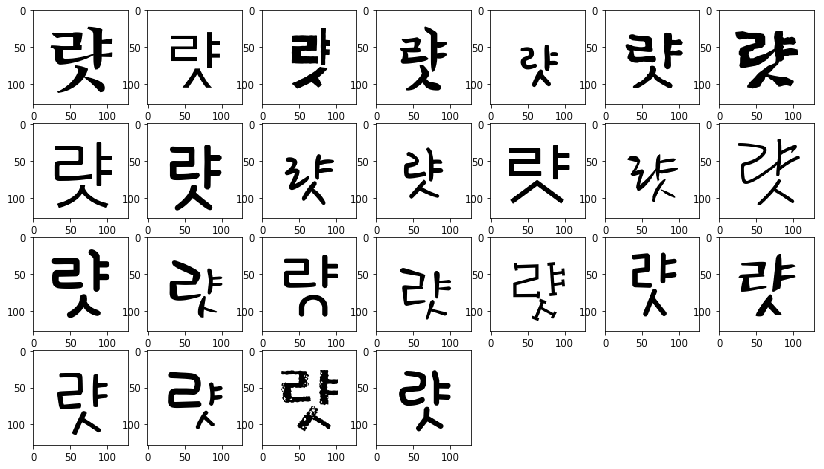

In [16]:
canvas_size = 128
plt.figure(figsize=(14, 8))
for i in range(25):
    font = ImageFont.truetype(trg_fonts[i], size=trg_char_size)
    plt.subplot(4, 7, i+1)
    dst_img = draw_single_char(charset[3015], font, canvas_size)
    plt.imshow(dst_img, cmap='gray')
plt.show()

- 두 글자 (target font, source font) 이미지 생성

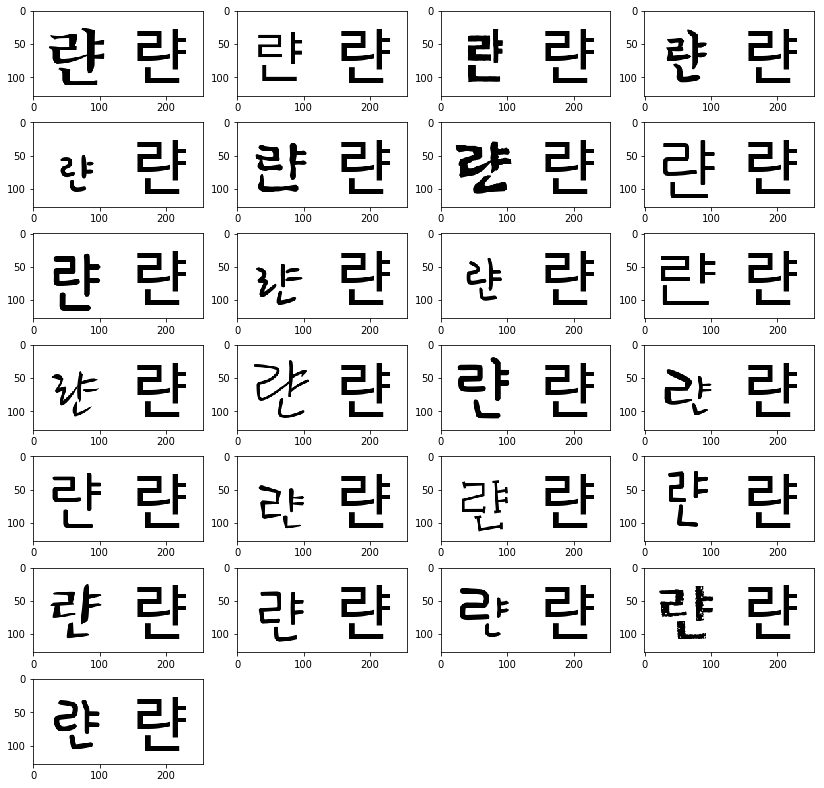

In [17]:
src_font = glob.glob(os.path.join(SRC_PATH, '*.ttf'))[0]
src_font = ImageFont.truetype(src_font, size=src_char_size)
plt.figure(figsize=(14, 14))
for i in range(25):
    font = ImageFont.truetype(trg_fonts[i], size=trg_char_size)
    e = draw_example(charset[3000], src_font, font, canvas_size)
    plt.subplot(7, 4, i+1)
    plt.imshow(e, cmap='gray')
plt.show()

## 데이터 생성 : `png 파일`

In [19]:
count = 0
font_label = 0
canvas_size = 128
font_count = 0
src_char_size = 90
trg_char_size = 95
OUTPUT_PATH = './get_data/hangul-dataset-11172/'

for font in trg_fonts:            
    font = ImageFont.truetype(font, size=trg_char_size)
    character_count = 0
    for c in charset:
        e = draw_example(c, src_font, font, canvas_size)
        if e:
            e.save(os.path.join(OUTPUT_PATH, "%d_%04d.png" % (font_label, character_count)))
            character_count += 1
            count += 1
            if count % 10000 == 0:
                print("processed %d chars" % count)
    font_label += 1
print("processed %d chars, end" % count)

processed 10000 chars
processed 20000 chars
processed 30000 chars
processed 40000 chars
processed 50000 chars
processed 60000 chars
processed 70000 chars
processed 80000 chars
processed 90000 chars
processed 100000 chars
processed 110000 chars
processed 120000 chars
processed 130000 chars
processed 140000 chars
processed 150000 chars
processed 160000 chars
processed 170000 chars
processed 180000 chars
processed 190000 chars
processed 200000 chars
processed 210000 chars
processed 220000 chars
processed 226659 chars, end


wow 226659 data!

## 데이터 생성 : `obj 파일`로 용량 줄여서 사용
- `package.py` 함수로 obj 파일 생성 

In [24]:
# -*- coding: utf-8 -*-
from __future__ import print_function
from __future__ import absolute_import

import argparse
import glob
import os
import pickle as pickle
import random


def pickle_examples(from_dir, train_path, val_path, train_val_split=0.2):
    """
    Compile a list of examples into pickled format, so during
    the training, all io will happen in memory
    """
    paths = glob.glob(os.path.join(from_dir, "*.png"))
    with open(train_path, 'wb') as ft:
        with open(val_path, 'wb') as fv:
            print('all data num:', len(paths))
            c = 1
            val_count = 0
            train_count = 0
            for p in paths:
                c += 1
                label = int(os.path.basename(p).split("_")[0])
                with open(p, 'rb') as f:
                    img_bytes = f.read()
                    example = (label, img_bytes)
                    r = random.random()
                    if r < train_val_split:
                        pickle.dump(example, fv)
                        val_count += 1
                        if val_count % 10000 == 0:
                            print("%d imgs saved in val.obj" % val_count)
                    else:
                        pickle.dump(example, ft)
                        train_count += 1
                        if train_count % 10000 == 0:
                            print("%d imgs saved in train.obj" % train_count)
            print("%d imgs saved in val.obj, end" % val_count)
            print("%d imgs saved in train.obj, end" % train_count)
            return

In [23]:
from_dir = './get_data/hangul-dataset-11172/'
save_dir = './dataset/'
train_path = os.path.join(save_dir, "train.obj")
val_path = os.path.join(save_dir, "val.obj")

pickle_examples(from_dir, train_path=train_path, val_path=val_path)

all data num: 226659
10000 imgs saved in train.obj
20000 imgs saved in train.obj
30000 imgs saved in train.obj
10000 imgs saved in val.obj
40000 imgs saved in train.obj
50000 imgs saved in train.obj
60000 imgs saved in train.obj
70000 imgs saved in train.obj
20000 imgs saved in val.obj
80000 imgs saved in train.obj
90000 imgs saved in train.obj
100000 imgs saved in train.obj
110000 imgs saved in train.obj
30000 imgs saved in val.obj
120000 imgs saved in train.obj
130000 imgs saved in train.obj
140000 imgs saved in train.obj
150000 imgs saved in train.obj
40000 imgs saved in val.obj
160000 imgs saved in train.obj
170000 imgs saved in train.obj
180000 imgs saved in train.obj
45576 imgs saved in val.obj, end
181083 imgs saved in train.obj, end
